# TensorFlow: Breast Cancer Classification

#### Start

In [1]:
# Initial System Setup
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# tensorFlow Version
print(tf.__version__)

2.0.0


In [3]:
# import raw data if data has headers
# column order in CSV file
column_names = ['code_number','Clump_Thickness', 'Cell_Size', 'Cell_Shape', ' Marginal_Adhesion',
                'Epithelial_Cell', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

raw_dataset = pd.read_csv('breast-cancer-wisconsin.data', names=column_names,
                      na_values = "?", sep=",", skipinitialspace=True)

In [4]:
dataset = raw_dataset.copy()
dataset = dataset.drop('code_number', 1)

In [5]:
dataset.tail()

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Epithelial_Cell,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
694,3,1,1,1,3,2.0,1,1,1,2
695,2,1,1,1,2,1.0,1,1,1,2
696,5,10,10,3,7,3.0,8,10,2,4
697,4,8,6,4,3,4.0,10,6,1,4
698,4,8,8,5,4,5.0,10,4,1,4


In [6]:
# Check if the dataset contains unknown values.

dataset.isna().sum()

Clump_Thickness        0
Cell_Size              0
Cell_Shape             0
 Marginal_Adhesion     0
Epithelial_Cell        0
Bare_Nuclei           16
Bland_Chromatin        0
Normal_Nucleoli        0
Mitoses                0
Class                  0
dtype: int64

In [9]:
# drop those rows containing any values if any
dataset = dataset.dropna()

In [10]:
# Split the data into train and test
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

print(len(train_dataset), len(test_dataset))

546 137


In [12]:
# Also look at the overall statistics
train_stats = train_dataset.describe()
train_stats.pop("Class")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Clump_Thickness,546.0,4.388278,2.810754,1.0,2.0,4.0,6.0,10.0
Cell_Size,546.0,3.141026,3.083588,1.0,1.0,1.0,5.0,10.0
Cell_Shape,546.0,3.212454,3.049246,1.0,1.0,1.0,5.0,10.0
Marginal_Adhesion,546.0,2.813187,2.846838,1.0,1.0,1.0,3.0,10.0
Epithelial_Cell,546.0,3.223443,2.236782,1.0,2.0,2.0,4.0,10.0
Bare_Nuclei,546.0,3.624542,3.696771,1.0,1.0,1.0,7.0,10.0
Bland_Chromatin,546.0,3.437729,2.467544,1.0,2.0,3.0,5.0,10.0
Normal_Nucleoli,546.0,2.785714,2.965839,1.0,1.0,1.0,3.0,10.0
Mitoses,546.0,1.615385,1.777139,1.0,1.0,1.0,1.0,10.0


In [13]:
# Split features from labels
# Separate the target value, or "label", from the features. 
# This label is the value that you will train the model to predict.

train_labels = train_dataset.pop('Class')
test_labels = test_dataset.pop('Class')

In [14]:
# Normalize the data 

def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [15]:
# view the normalized data
# This normalized data is what we will use to train the model.
normed_train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Clump_Thickness,546.0,-1.512831e-16,1.0,-1.205469,-0.849693,-0.138140,0.573412,1.996518
Cell_Size,546.0,2.277381e-17,1.0,-0.694329,-0.694329,-0.694329,0.602861,2.224348
Cell_Shape,546.0,-5.856121e-17,1.0,-0.725574,-0.725574,-0.725574,0.586226,2.225975
Marginal_Adhesion,546.0,-1.398962e-16,1.0,-0.636913,-0.636913,-0.636913,0.065621,2.524490
Epithelial_Cell,546.0,-6.506802e-17,1.0,-0.994037,-0.546966,-0.546966,0.347176,3.029601
Bare_Nuclei,546.0,2.928061e-17,1.0,-0.709955,-0.709955,-0.709955,0.913083,1.724602
Bland_Chromatin,546.0,-7.808162e-17,1.0,-0.987917,-0.582656,-0.177395,0.633128,2.659434
Normal_Nucleoli,546.0,6.994812e-17,1.0,-0.602094,-0.602094,-0.602094,0.072251,2.432461
Mitoses,546.0,3.253401e-17,1.0,-0.346278,-0.346278,-0.346278,-0.346278,4.718042


### The model

In [21]:
# Build the model

# a Sequential model with two densely connected hidden layers, & an output layer that returns a single, continuous value. 
# The model building steps are wrapped in a function, build_model, since we'll create a second model, later on.

def build_model():
    model = keras.Sequential([
       layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
       layers.Dense(64, activation='relu'),
       layers.Dense(1)])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [22]:
model = build_model()

In [23]:
# Inspect the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Now try out the model. 
# Take a batch of 10 examples from the training data and call model.predict on it.

example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.37565592],
       [-0.38458055],
       [ 0.18505268],
       [ 0.00520385],
       [-0.48572078],
       [-0.42405045],
       [-0.22748165],
       [ 0.22868012],
       [-0.37728655],
       [-0.4412674 ]], dtype=float32)

In [25]:
# Train the model
# Train the model for 1000 epochs,
# and record the training and validation accuracy in the history object.

# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
    
EPOCHS = 1000
    
history = model.fit(
    normed_train_data, train_labels,
    epochs=EPOCHS, validation_split = 0.2, verbose=0,
    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [27]:
# View History
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.002876,0.041828,0.002876,0.141675,0.181437,0.141675,995
996,0.004074,0.049812,0.004074,0.146600,0.192921,0.146600,996
997,0.005062,0.054288,0.005062,0.134790,0.166451,0.134790,997
998,0.004968,0.048214,0.004968,0.137452,0.180864,0.137452,998
999,0.003080,0.042241,0.003080,0.134889,0.166251,0.134889,999


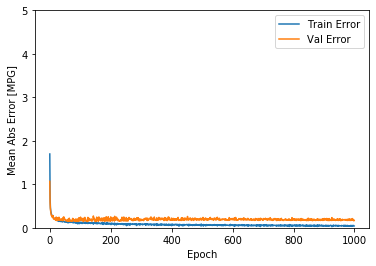

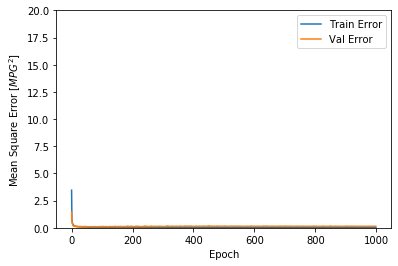

In [28]:
# Plot History

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'],
             label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
             label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'],
             label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
             label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()
    
    
plot_history(history)


...............................

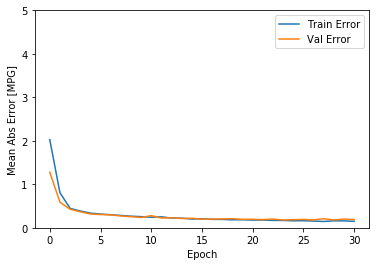

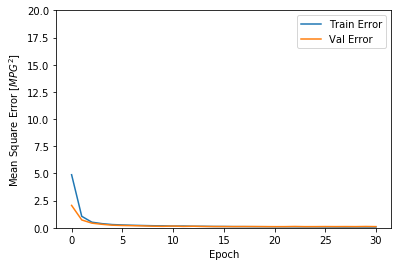

In [29]:
# Let's update the model.fit call to automatically stop training when the validation score doesn't improve.

model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [30]:
# Let's see how well the model generalizes by using the test set,was not used when training the model. 
# This tells us how well we can expect the model to predict when we use it in the real world.

loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} quality".format(mae))

137/137 - 0s - loss: 0.1601 - mae: 0.2376 - mse: 0.1601
Testing set Mean Abs Error:  0.24 quality


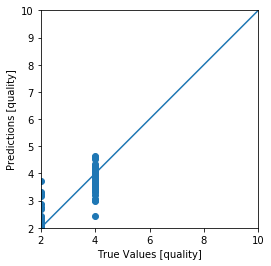

In [31]:
# Make predictions
# Finally, predict MPG values using data in the testing set:

test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [quality]')
plt.ylabel('Predictions [quality]')
lims = [2, 10]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

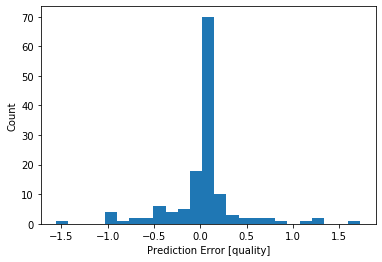

In [32]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [quality]")
_ = plt.ylabel("Count")

### Predictions By Example

In [33]:
# pick samples
i = 10
example_batch1 = normed_test_data[:i]
example_test_labels = test_labels[:i]

In [34]:
# test samples
example_batch1

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Epithelial_Cell,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
9,-0.138140,-0.370032,-0.725574,-0.636913,-0.546966,-0.709955,-0.582656,-0.602094,-0.346278
11,-0.849693,-0.694329,-0.725574,-0.636913,-0.546966,-0.709955,-0.582656,-0.602094,-0.346278
19,0.573412,-0.694329,-0.725574,-0.636913,-0.546966,-0.709955,-0.177395,-0.602094,-0.346278
24,-1.205469,-0.694329,-0.725574,-0.636913,-0.546966,-0.709955,-0.177395,-0.602094,-0.346278
29,-1.205469,-0.694329,-0.069674,-0.636913,-0.546966,-0.709955,-0.987917,-0.602094,-0.346278
33,-0.849693,-0.694329,-0.725574,-0.285646,-0.546966,-0.709955,-0.177395,-0.602094,-0.346278
37,0.573412,-0.370032,-0.725574,-0.636913,-0.994037,-0.709955,1.443650,-0.602094,-0.346278
43,0.217636,0.927158,0.586226,1.119422,3.029601,-0.709955,-0.177395,-0.602094,-0.346278
44,1.996518,2.224348,2.225975,0.416888,2.135459,-0.709955,1.848911,2.432461,-0.346278
45,-1.205469,-0.694329,-0.725574,-0.636913,-0.546966,-0.709955,-0.582656,-0.602094,0.216424


In [35]:
# test sample labels
example_test_labels

9     2
11    2
19    2
24    2
29    2
33    2
37    2
43    4
44    4
45    2
Name: Class, dtype: int64

In [36]:
# prediction
example_result = model.predict(example_batch1)
example_result

array([[2.0842416],
       [2.088401 ],
       [2.1939769],
       [2.080214 ],
       [2.0788522],
       [1.9981506],
       [2.8712232],
       [3.0239434],
       [4.5156565],
       [2.0256324]], dtype=float32)

In [39]:
# More accurate results
# rounding options (int, np.rint, np.ceil)
import numpy as np

for i in np.arange(len(example_result)):
    if int(example_result[i]) != np.array(example_test_labels)[i]:
        print('miss classification')
    else:
        print('Correct prediction')

Correct prediction
Correct prediction
Correct prediction
Correct prediction
Correct prediction
miss classification
Correct prediction
miss classification
Correct prediction
Correct prediction


### The End